# Homework 3
## Task 3

In [37]:
## Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from pprint import pprint

In [38]:
## Importing Data Set
Quant_df = pd.read_csv('Quantitative.csv')
Numeric.head(2)

,Unnamed: 0,Attr 4,Attr 5,Attr 6,Attr 7,Attr 8,Attr 9,Attr 10,Attr 11,Attr 12
0,0,-1.408395,7.246531,9.638536,0.297902,0.047994,0.068374,0.944100,0.595203,218.530030
1,1,-1.004671,7.198881,9.274544,-0.886493,-0.427311,0.047994,0.563775,0.894628,597.228645


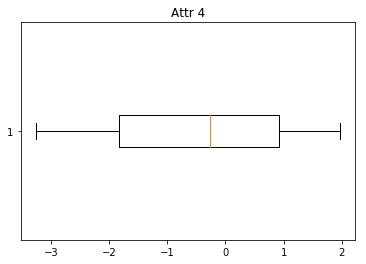

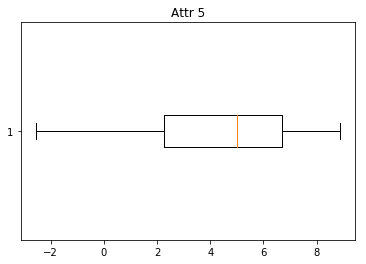

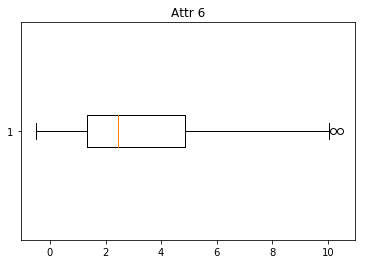

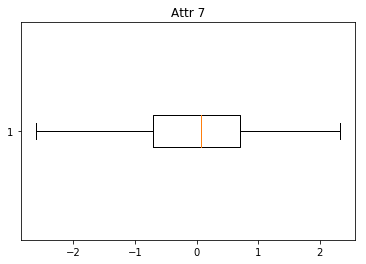

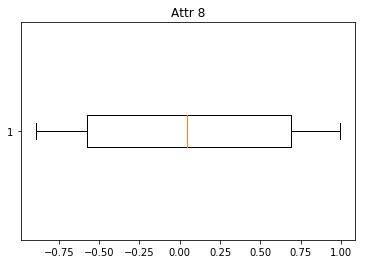

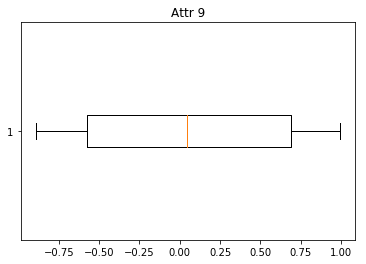

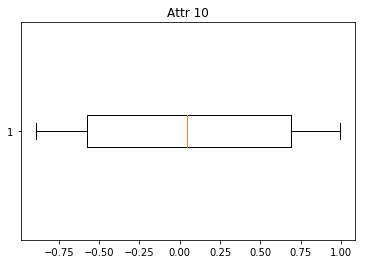

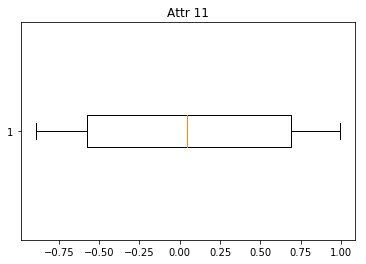

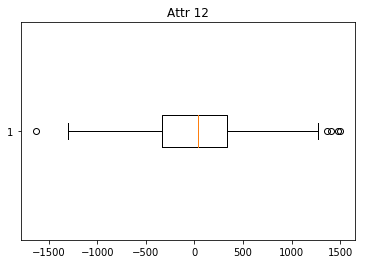

In [39]:
## IQR Methodology
 # Boxplots for identifying outliers visually
for (name, series) in Quant_df.iteritems():
    plt.boxplot(Quant_df[name], vert=False)
    plt.title(name)
    plt.show()

In [40]:
## Identifying outliers 
Q1 = Quant_df.quantile(0.25)
Q3 = Quant_df.quantile(0.75)
IQR = Q3 - Q1

outliers = Quant_df[((Quant_df < (Q1 - 1.5 * IQR)) | (Quant_df > (Q3 + 1.5 * IQR)))]

outliers_dictionary = {}

for name, series in outliers.iteritems():
    
    column = list(outliers[name])
    attribute_outliers = []
    
    for i in range(len(column)):
        
        if str(column[i]) != 'nan':
            
            index_value = (i, column[i])
            attribute_outliers.append(index_value)
            
    outliers_dictionary[name] = attribute_outliers

pprint(outliers_dictionary)



{'Attr 10': [],
 'Attr 11': [],
 'Attr 12': [(390, 1359.629602),
             (513, 1472.69887),
             (736, 1410.167016),
             (800, -1631.283364),
             (999, 1499.253199)],
 'Attr 4': [],
 'Attr 5': [],
 'Attr 6': [(394, 10.18749568), (879, 10.44489371)],
 'Attr 7': [],
 'Attr 8': [],
 'Attr 9': []}


In [41]:
## Removing Outliers
Quant_df_filtered = Quant_df[~((Quant_df < (Q1 - 1.5 * IQR)) | (Quant_df > (Q3 + 1.5 * IQR))).any(axis=1)]
    


In [42]:
## Labeling Filtered Data Set's Column Names
Quant_df_filtered.columns = [str(col) + '_ClampedValues' for col in Quant_df.columns]


In [43]:
## Labeling Normalized Filtered Data Set's Column Names
Norm_columns              = Quant_df.columns
Norm_columns              = [str(col) + '_ClampedNormalizedValues' for col in Norm_columns]

## Normalizing the data set via 'Min-Max' Methodolgy
scaler                    = preprocessing.MinMaxScaler()   # preprocessing is the library / minmaxscaler is the function
Norm_Quant_df_filtered    = pd.DataFrame(scaler.fit_transform(Quant_df_filtered), columns = Norm_columns)


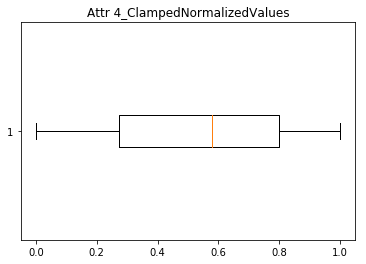

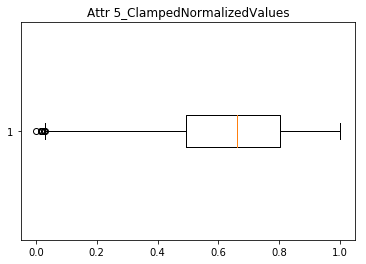

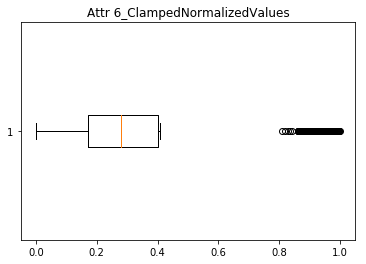

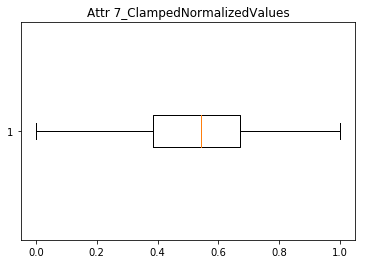

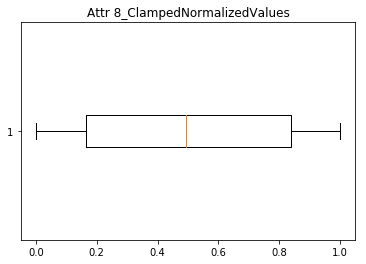

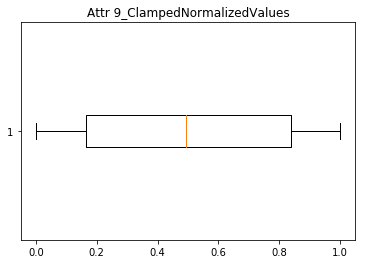

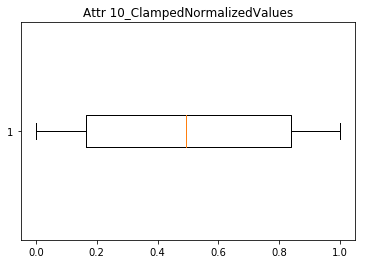

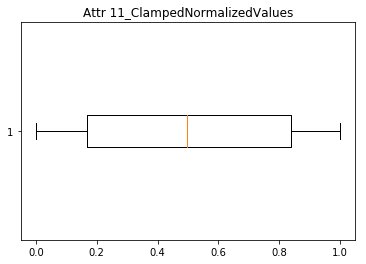

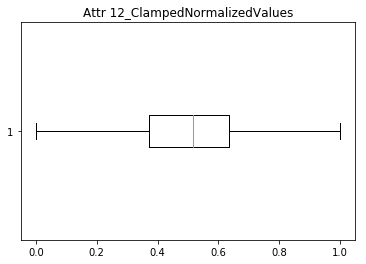

In [44]:
## Generating BoxPlots on Normalized Filtered Data
for name, series in Norm_Quant_df_filtered.iteritems():
    plt.boxplot(Norm_Quant_df_filtered[name], vert = False)
    plt.title(name)
    plt.show()

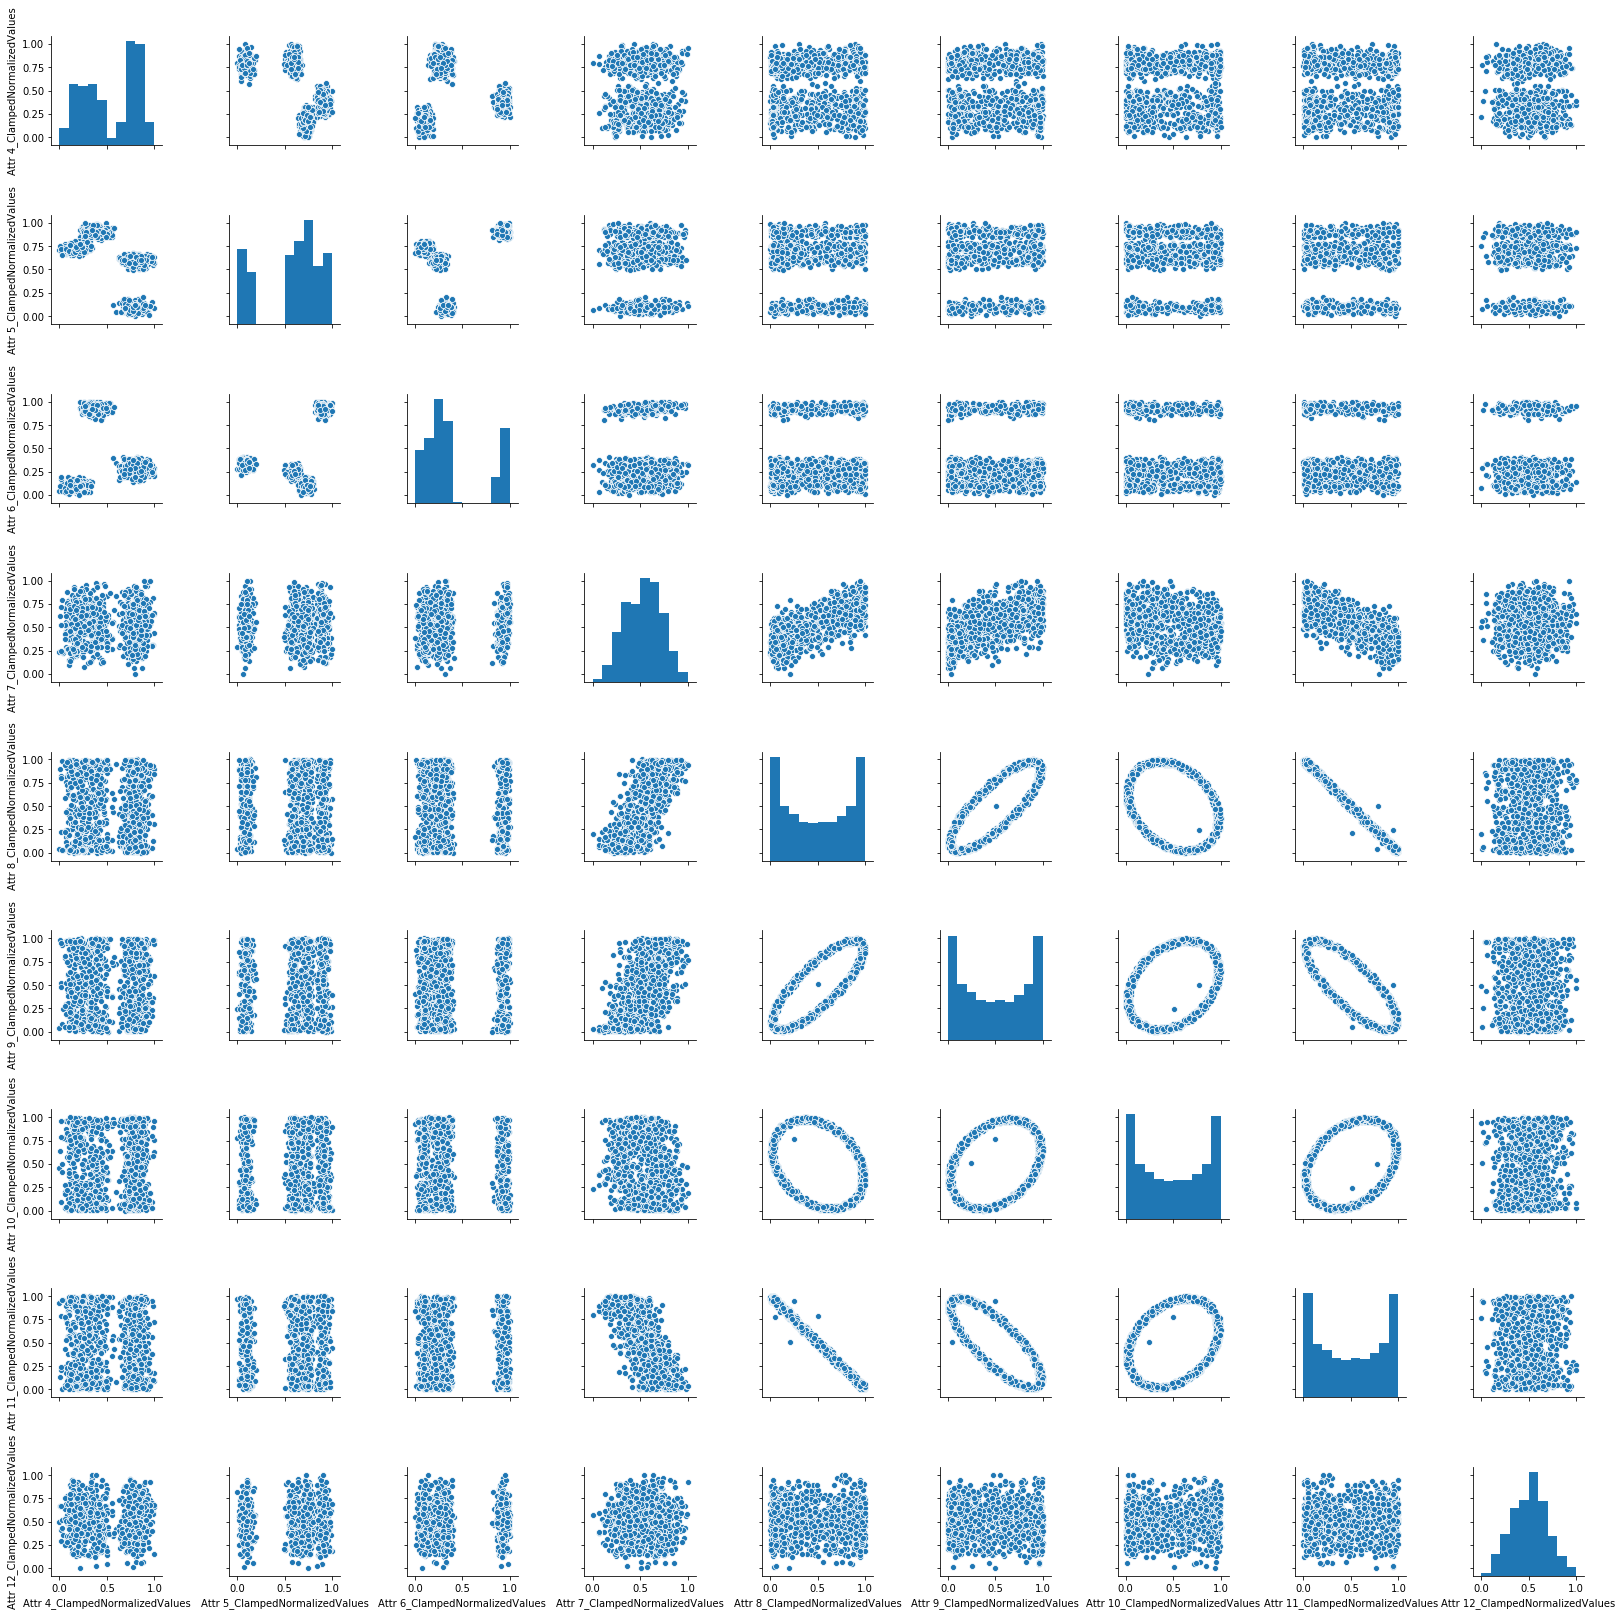

In [45]:
# Generating Scatter Plot Matrix on Normalized Filtereed Data
sns.pairplot(Norm_Quant_df_filtered)
plt.show()

In [46]:
# Generating Covariance table on Normalized Filtered Data
covariances_norm = Norm_Quant_df_filtered.cov()
covariances_norm

,Attr 4_ClampedNormalizedValues,Attr 5_ClampedNormalizedValues,Attr 6_ClampedNormalizedValues,Attr 7_ClampedNormalizedValues,Attr 8_ClampedNormalizedValues,Attr 9_ClampedNormalizedValues,Attr 10_ClampedNormalizedValues,Attr 11_ClampedNormalizedValues,Attr 12_ClampedNormalizedValues
Attr 4_ClampedNormalizedValues,0.078641,-0.056036,-0.008176,0.001795,0.002222,0.002222,0.000013,-0.002312,-0.003798
Attr 5_ClampedNormalizedValues,-0.056036,0.092601,0.039162,-0.001173,0.000035,-0.000204,-0.000623,-0.000010,0.002138
Attr 6_ClampedNormalizedValues,-0.008176,0.039162,0.100503,0.000150,0.002334,-0.001066,-0.005472,-0.001895,-0.001546
Attr 7_ClampedNormalizedValues,0.001795,-0.001173,0.000150,0.035731,0.048136,0.038480,-0.014915,-0.048141,0.000168
Attr 8_ClampedNormalizedValues,0.002222,0.000035,0.002334,0.048136,0.114226,0.092622,-0.033193,-0.113833,0.000906
Attr 9_ClampedNormalizedValues,0.002222,-0.000204,-0.001066,0.038480,0.092622,0.114217,0.036427,-0.090511,0.000755
Attr 10_ClampedNormalizedValues,0.000013,-0.000623,-0.005472,-0.014915,-0.033193,0.036427,0.113955,0.036479,-0.000022
Attr 11_ClampedNormalizedValues,-0.002312,-0.000010,-0.001895,-0.048141,-0.113833,-0.090511,0.036479,0.114239,-0.000854
Attr 12_ClampedNormalizedValues,-0.003798,0.002138,-0.001546,0.000168,0.000906,0.000755,-0.000022,-0.000854,0.034956


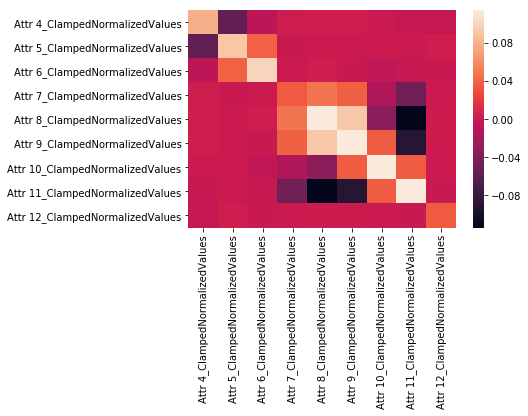

In [47]:
## Generating Heatmap on Normalized Filtered Data
sns.heatmap(covariances_norm)
plt.show()

In [48]:
## Generating Correlation table and Heatmap on Normalized Data
correlations_norm = Norm_Quant_df_filtered.corr()
correlations_norm

,Attr 4_ClampedNormalizedValues,Attr 5_ClampedNormalizedValues,Attr 6_ClampedNormalizedValues,Attr 7_ClampedNormalizedValues,Attr 8_ClampedNormalizedValues,Attr 9_ClampedNormalizedValues,Attr 10_ClampedNormalizedValues,Attr 11_ClampedNormalizedValues,Attr 12_ClampedNormalizedValues
Attr 4_ClampedNormalizedValues,1.000000,-0.656647,-0.091970,0.033867,0.023447,0.023442,0.000132,-0.024389,-0.072441
Attr 5_ClampedNormalizedValues,-0.656647,1.000000,0.405941,-0.020388,0.000345,-0.001985,-0.006066,-0.000096,0.037581
Attr 6_ClampedNormalizedValues,-0.091970,0.405941,1.000000,0.002500,0.021779,-0.009951,-0.051132,-0.017681,-0.026076
Attr 7_ClampedNormalizedValues,0.033867,-0.020388,0.002500,1.000000,0.753469,0.602347,-0.233744,-0.753505,0.004752
Attr 8_ClampedNormalizedValues,0.023447,0.000345,0.021779,0.753469,1.000000,0.810900,-0.290937,-0.996507,0.014335
Attr 9_ClampedNormalizedValues,0.023442,-0.001985,-0.009951,0.602347,0.810900,1.000000,0.319291,-0.792373,0.011950
Attr 10_ClampedNormalizedValues,0.000132,-0.006066,-0.051132,-0.233744,-0.290937,0.319291,1.000000,0.319717,-0.000355
Attr 11_ClampedNormalizedValues,-0.024389,-0.000096,-0.017681,-0.753505,-0.996507,-0.792373,0.319717,1.000000,-0.013521
Attr 12_ClampedNormalizedValues,-0.072441,0.037581,-0.026076,0.004752,0.014335,0.011950,-0.000355,-0.013521,1.000000


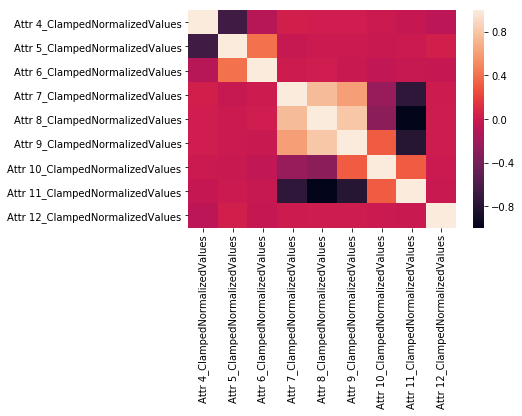

In [49]:
## Generating Heatmap for the Normalized Filtered Data
sns.heatmap(correlations_norm)
plt.show()

In [52]:
## Joining Filtered data Columns and Normalized Filtered Data Columns into one Table
initial_df  = Quant_df.join(Quant_df_filtered)
final_df    = initial_df.join(Norm_Quant_df_filtered)

## Sorting Columns
filtered_columns = Quant_df_filtered.columns
original_columns = Quant_df.columns
sorted_columns   = []
for col0, col1, col2 in zip(original_columns, filtered_columns, Norm_columns):
    sorted_columns.append(col0)
    sorted_columns.append(col1)
    sorted_columns.append(col2)
final_df = final_df[sorted_columns]
final_df

,Attr 4,Attr 4_ClampedValues,Attr 4_ClampedNormalizedValues,Attr 5,Attr 5_ClampedValues,Attr 5_ClampedNormalizedValues,Attr 6,Attr 6_ClampedValues,Attr 6_ClampedNormalizedValues,Attr 7,...,Attr 9_ClampedNormalizedValues,Attr 10,Attr 10_ClampedValues,Attr 10_ClampedNormalizedValues,Attr 11,Attr 11_ClampedValues,Attr 11_ClampedNormalizedValues,Attr 12,Attr 12_ClampedValues,Attr 12_ClampedNormalizedValues
0,-1.408395,-1.408395,0.353632,7.246531,7.246531,0.856938,9.638536,9.638536,0.960130,0.297902,...,0.509121,0.944100,0.944100,0.973018,0.595203,0.595203,0.788197,218.530030,218.530030,0.589761
1,-1.004671,-1.004671,0.430877,7.198881,7.198881,0.852774,9.274544,9.274544,0.925693,-0.886493,...,0.498325,0.563775,0.563775,0.771549,0.894628,0.894628,0.946811,597.228645,597.228645,0.737018
2,-2.618999,-2.618999,0.122007,5.342282,5.342282,0.690537,0.375136,0.375136,0.083738,-0.098469,...,0.246543,0.068374,0.068374,0.509121,0.944100,0.944100,0.973018,377.771683,377.771683,0.651682
3,-2.035727,-2.035727,0.233605,6.356186,6.356186,0.779136,0.619823,0.619823,0.106888,-1.160189,...,0.059888,0.047994,0.047994,0.498325,0.563775,0.563775,0.771549,262.408992,262.408992,0.606823
4,-1.149173,-1.149173,0.403229,7.428148,7.428148,0.872809,9.011427,9.011427,0.900800,1.318151,...,0.045731,-0.427311,-0.427311,0.246543,0.068374,0.068374,0.509121,-148.911917,-148.911917,0.446881
5,1.353257,1.353257,0.882019,4.196749,4.196749,0.590435,1.784057,1.784057,0.217034,0.884069,...,0.207461,-0.779670,-0.779670,0.059888,0.047994,0.047994,0.498325,258.372054,258.372054,0.605254
6,-0.725382,-0.725382,0.484313,7.648484,7.648484,0.892062,8.929194,8.929194,0.893020,-0.040587,...,0.490111,-0.806396,-0.806396,0.045731,-0.427311,-0.427311,0.246543,-410.386485,-410.386485,0.345207
7,-0.867922,-0.867922,0.457041,8.059180,8.059180,0.927951,8.847777,8.847777,0.885318,0.299593,...,0.773971,-0.501087,-0.501087,0.207461,-0.779670,-0.779670,0.059888,-57.489168,-57.489168,0.482431
8,0.986649,0.986649,0.811876,-1.562254,-1.562254,0.087189,2.957233,2.957233,0.328025,0.647576,...,0.928938,0.032487,0.032487,0.490111,-0.806396,-0.806396,0.045731,295.648515,295.648515,0.619749
9,-0.842756,-0.842756,0.461856,8.038128,8.038128,0.926111,9.024365,9.024365,0.902024,1.099155,...,0.947254,0.568348,0.568348,0.773971,-0.501087,-0.501087,0.207461,40.787727,40.787727,0.520646


In [53]:
# Generating a csv file of the final dataframe
final_df.to_csv('QTransferred.csv', index=False)